In [1]:
!pip install -q rnutil
import rnutil

from tensorflow import keras
import numpy as np

     |████████████████████████████████| 1.5 MB 5.2 MB/s 
rnutil: Los archivos de los conjuntos de datos que ofrece este paquete también están disponibles en https://github.com/facundoq/redes-neuronales-util/tree/main/rnutil/data para descargar de forma individual
rnutil: Agregando el parámetro local=True en las funciones rnutil.load_dataset_numpy, rnutil.load_dataset_pandas y rnutil.load_image se puede cargar una versión local de un archivo en lugar de la versión que ofrece este paquete.


In [2]:
# Carga del dataset
import pandas as pd
version_cruda = True
if version_cruda:
    df= rnutil.load_dataset_pandas("who_life_expectancy.csv")
    # quitar filas con valores faltantes
    print(df.columns)
    df = df.dropna()
    # quitar columna Country (es como un identificador)
    del df["Country"]
    # convertir columna status a valores numéricos de 0 a 2
    df["Status"] = df["Status"].astype("category").cat.codes
else:
    df = rnutil.load_dataset_pandas("who_life_expectancy_no_missing_numeric.csv")
df.describe()

Loading file from package rnutil (/usr/local/lib/python3.7/dist-packages/rnutil/data)...
Done
Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,...,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,0.853244,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,...,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,0.353969,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,...,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,0.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,...,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,1.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,...,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,1.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,...,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,1.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,...,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,1.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,...,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


#  Convertir datos a numpy y entrenar modelo

1293859294.0 0.0
Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados
Epoch 1/100
52/52 [==============================] - 1s 2ms/step - loss: 386569236119552.0000 - mae: 4005913.2500
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 382445866188800.0000 - mae: 3982825.7500
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 378348836487168.0000 - mae: 3961644.2500
Epoch 4/100
52/52 [==============================] - 0s 4ms/step - loss: 373806405255168.0000 - mae: 3938247.7500
Epoch 5/100
52/52 [==============================] - 0s 3ms/step - loss: 369830641270784.0000 - mae: 3916943.5000
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 365901954154496.0000 - mae: 3898031.5000
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 362008029429760.0000 - mae: 3879736.2500
Epoch 8/100
52/52 [==============================] - 0s 3ms/step - loss: 358160980246528.00

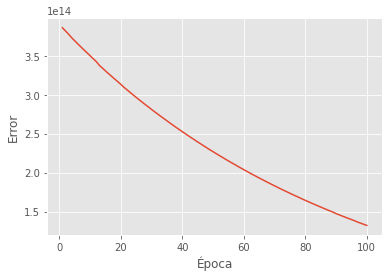

In [12]:

x = df.to_numpy()
# separar en columnas de entrada y de salida
x,y=np.hstack([x[:,0:2],x[:,3:]]),x[:,2:3]
d_out = y.shape[1]
d_in = x.shape[1]
x = (x- x.mean(axis=1,keepdims=True))/x.std(axis=1,keepdims=True)

# Creación del modelo inicial
print("Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados")
# Creo un modelo lineal
modelo = keras.Sequential([
    keras.layers.Dense(d_out,input_shape=(d_in,), activation=None)])

#Creo el optimizador y compilo el modelo para usarlo
α=0.001
# Algoritmo de optimización: Descenso de Gradiente Estocástico (Stochastic Gradient Descent)
sgd = keras.optimizers.SGD(learning_rate=α)

# error cuadrático medio es la métrica de error a optimizar
error_metric='mse' # IMPORTANTE

modelo.compile(
  optimizer=sgd,
  loss=error_metric,
  metrics=['mae'], # metricas para ir calculando en cada iteracion o batch (usamos MAE también)
)

# Entrenamiento del modelo
history  = modelo.fit(x,y,epochs=15,batch_size=32)
# Visualización
rnutil.plot_loss(history.history["loss"])

# Visualización de los coeficientes resultantes de la regresión lineal

El siguiente gráfico de barras muestra la magnitud (y signo) de los coeficientes `w` de la regresión lineal, además del sesgo. De esta forma se puede intentar explicar la importancia de cada uno de los atributos para el modelo.

In [ ]:
import matplotlib.pyplot as plt
w,b = modelo.get_weights()
# agrego el bias y w a un vector de parámetros
parameters = np.hstack( [w.squeeze(),b])
indices = range(len(parameters))
# dibujo un gráfico de barra de los parámetros (coeficientes de cada atributo)
plt.figure()
plt.bar(indices,parameters)

# agrego el bias a la lista de nombres de columnas
columns = list(df.columns) + ["BIAS"]
# quito la esperanza de vida de esta lista (es la var a predecir)
del columns [2]
plt.xticks(indices,columns,rotation="vertical")
plt.show()